In [23]:
import pandas as pd
import numpy as np

reading,spliting and cleaning the data for a bank

In [24]:
marketing = pd.read_csv("bank_marketing.csv")

In [25]:
# Split into the three tables
client = marketing[["client_id", "age", "job", "marital",
                    "education", "credit_default", "mortgage"]]
campaign = marketing[["client_id", "number_contacts", "month", "day",
               "contact_duration", "previous_campaign_contacts", "previous_outcome", "campaign_outcome"]]
economics = marketing[["client_id", "cons_price_idx", "euribor_three_months"]]


In [26]:
## Editing the client dataset
# Clean education column
client["education"] = client["education"].str.replace(".", "_")
client["education"] = client["education"].replace("unknown", np.nan)

<ipython-input-26-fa5116d81d9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["education"] = client["education"].str.replace(".", "_")
<ipython-input-26-fa5116d81d9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["education"] = client["education"].replace("unknown", np.nan)


In [27]:
# Clean job column
client["job"] = client["job"].str.replace(".", "_")

<ipython-input-27-ad33b214d681>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client["job"] = client["job"].str.replace(".", "_")


In [30]:
# Clean and convert client columns to bool data type
for col in ["credit_default", "mortgage"]:
  client[col] = client[col].map({"yes": 1,
                                 "no": 0,
                                 "unknown": 0})
  client[col] = client[col].astype(bool)

<ipython-input-30-47e00495a3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client[col] = client[col].map({"yes": 1,
<ipython-input-30-47e00495a3f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client[col] = client[col].astype(bool)
<ipython-input-30-47e00495a3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [29]:
# Editing the campaign dataset
# Change campaign_outcome to binary values
campaign["campaign_outcome"] = campaign["campaign_outcome"].map({"yes": 1,
                                                                 "no": 0})


<ipython-input-29-ff3e9045c77f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign["campaign_outcome"] = campaign["campaign_outcome"].map({"yes": 1,


In [28]:
# Convert previous_outcome to binary values
campaign["previous_outcome"] = campaign["previous_outcome"].map({"success": 1,
                                                                 "failure": 0,
                                                                 "nonexistent": 0})

<ipython-input-28-210a1907a24c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign["previous_outcome"] = campaign["previous_outcome"].map({"success": 1,


In [31]:
# Add year column
campaign["year"] = "2022"

# Convert day to string
campaign["day"] = campaign["day"].astype(str)

# Add last_contact_date column
campaign["last_contact_date"] = campaign["year"] + "-" + campaign["month"] + "-" + campaign["day"]


<ipython-input-31-f05537d5bd3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign["year"] = "2022"
<ipython-input-31-f05537d5bd3e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign["day"] = campaign["day"].astype(str)
<ipython-input-31-f05537d5bd3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [32]:
# Convert to datetime
campaign["last_contact_date"] = pd.to_datetime(campaign["last_contact_date"],
                                               format="%Y-%b-%d")


<ipython-input-32-cbe5d67cc744>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign["last_contact_date"] = pd.to_datetime(campaign["last_contact_date"],


In [33]:
# Clean and convert outcome columns to bool
for col in ["campaign_outcome", "previous_outcome"]:
  campaign[col] = campaign[col].astype(bool)

<ipython-input-33-8b7c192b49eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign[col] = campaign[col].astype(bool)
<ipython-input-33-8b7c192b49eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign[col] = campaign[col].astype(bool)


In [34]:
# Drop unneccessary columns
campaign.drop(columns=["month", "day", "year"], inplace=True)

<ipython-input-34-8c70e945a4b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign.drop(columns=["month", "day", "year"], inplace=True)


In [35]:
# Save tables to individual csv files
client.to_csv("client.csv", index=False)
campaign.to_csv("campaign.csv", index=False)
economics.to_csv("economics.csv", index=False)

Goal: Group clients into meaningful segments for targeted marketing.

In [36]:
features = client[["age", "credit_default", "mortgage"]]
features = pd.get_dummies(client[["job", "marital", "education"]], drop_first=True).join(features)

Scale Features

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

Apply Clustering

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
client['segment'] = kmeans.fit_predict(X_scaled)

<ipython-input-38-a170125c90f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client['segment'] = kmeans.fit_predict(X_scaled)


Visualize Segments
Use PCA or t-SNE to reduce dimensions and visualize

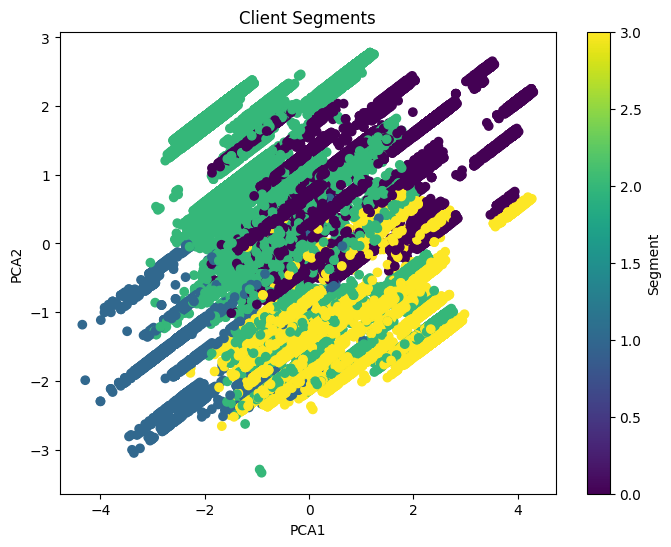

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=client['segment'], cmap='viridis')
plt.title('Client Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Segment')
plt.show()

Predict campaign success and explain why a client is likely to say "yes".

 Prepare Data
Use campaign merged with client (target column like campaign_outcome)

In [40]:
data = campaign.merge(client, on="client_id")
X = data.drop(columns=["client_id", "campaign_outcome"])
y = data["campaign_outcome"]
X = pd.get_dummies(X, drop_first=True)

Train Model

In [41]:
# Drop or transform datetime before splitting
X = data.drop(columns=["client_id", "campaign_outcome", "last_contact_date"])
X = pd.get_dummies(X, drop_first=True)
y = data["campaign_outcome"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

<Figure size 640x480 with 0 Axes>

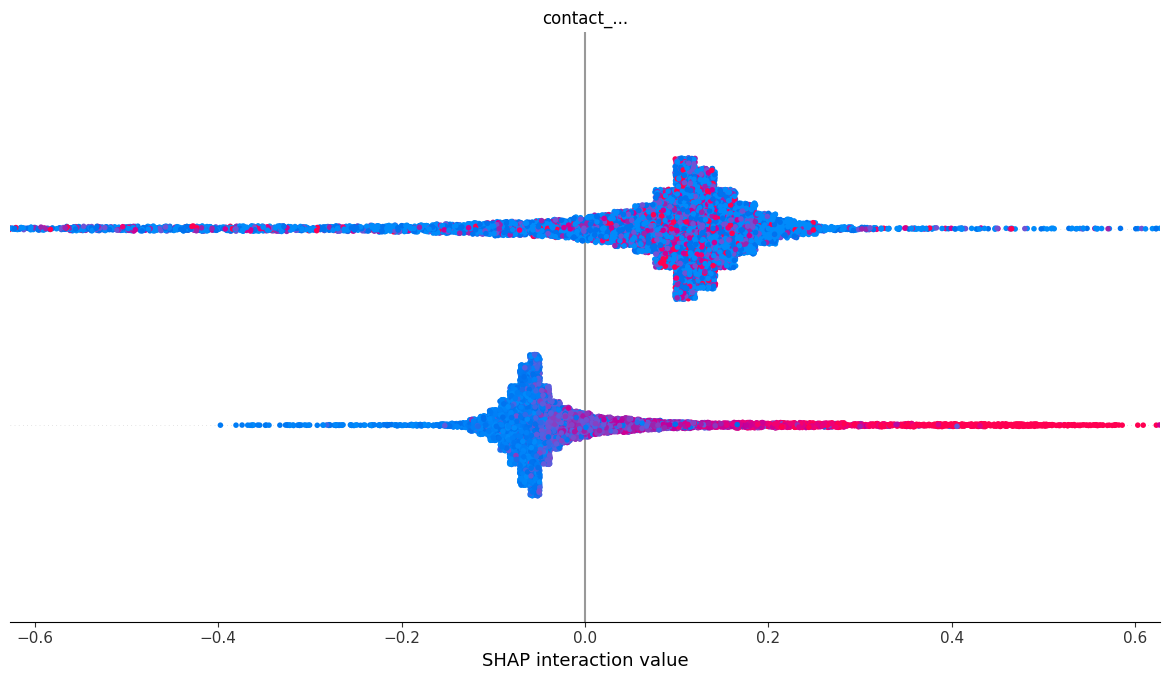

In [45]:
import shap
import pandas as pd

# Convert all object columns to numeric using one-hot encoding
X_train_clean = pd.get_dummies(X_train, drop_first=True)
X_test_clean = pd.get_dummies(X_test, drop_first=True)

# Align the columns (SHAP and model must have same feature space)
X_train_clean, X_test_clean = X_train_clean.align(X_test_clean, join='left', axis=1, fill_value=0)

# Create the SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values (approximate = True for faster computation if needed)
shap_values = explainer.shap_values(X_test_clean, approximate=True)

# Summary plot
shap.summary_plot(shap_values, X_test_clean)


Explain Individual Predictions